In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

This file is the Report for Task 4 of week 2. All important tasks are performed in the Fortran files. Only the plotting is done in Python.
For detailed information about the implementation, see the Fortran file.

First of all, let's define some handy functions:

In [57]:
# Function to read the data from the file
def read_data(file_name = 'task3_res.txt'):
    file_path = os.path.join(os.getcwd(), file_name)

    # Initialize empty lists to store the data
    numerical_derivatives = []
    analytical_derivatives = []
    errors = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Process each line
        count = 0
        for line in lines:
            # Split the line into words
            parts = line.split()
            
            # Skip the first four words ("Numerical 2nd derivative:", etc.) and convert the rest to floats
            if count == 1:
                numerical_derivatives = [float(value) for value in parts]
            elif count == 3:
                analytical_derivatives = [float(value) for value in parts]
            elif count == 5:
                errors = [np.abs(float(value)) for value in parts]

            count += 1


    return np.asarray(numerical_derivatives), np.asarray(analytical_derivatives), np.asarray(errors)



In [106]:
# Function to plot the numerical and analytical derivatives
def ploting(numerical_derivatives, analytical_derivatives, errors):
    # Index array for x-axis
    index_array = np.arange(len(numerical_derivatives))

    #interpolate the analytical derivatives
    x = np.arange(0, len(analytical_derivatives))
    y = analytical_derivatives
    x_new = np.arange(0, len(analytical_derivatives), 0.1)

    # Perform cubic interpolation on the analytical derivatives
    cs = CubicSpline(x, y)
    y_new = cs(x_new)



    # Plot numerical and analytical derivatives
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot

    plt.scatter(index_array, numerical_derivatives, label='Numerical Derivatives', marker='x')
    plt.scatter(index_array, analytical_derivatives, label='Analytical Derivatives', marker='x')
    plt.plot(x_new, y_new, label='Interpolated Analytical Derivatives', linestyle='dashed')
    plt.title('Numerical vs Analytical Derivatives')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    # Plot the errors
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.scatter(index_array[1:-1], errors[1:-1], label='Error', color='red', marker='o')
    #plt.plot(errors[1:-1], label='Error', color='red', marker='o')
    plt.title('Error in Derivatives')
    plt.xlabel('Datapoint Index')
    plt.ylabel('Error Value')
    plt.legend()

    plt.tight_layout()
    plt.show()



Execute with poly function:

 Enter the number of grid points (n):
 Enter the grid spacing (h):
 numerical 2nd derivative:
   0.00000000      0.499999940       1.10000014       1.93999922       3.02000022       4.33999729       5.90001011       7.69999552       9.73998260       12.0200148       14.5399799       17.3000565       20.2998619       23.5401134       27.0200233       30.7398777       34.7001038       38.8996086       43.3403931       48.0205498       52.9388390       58.1003151       63.5002098       69.1398544       75.0209732       81.1389847       87.4988480       94.1032333       100.936882       108.022301       115.338890       122.897331       130.703720       138.737473       147.022995       155.535873       164.298996       173.307785       182.531723       192.019638       201.754745       211.682114       221.902451       232.339462       243.023666       253.948959       265.081757       276.507538       288.140839       300.012177       312.170380       324.475067       337.103241       34

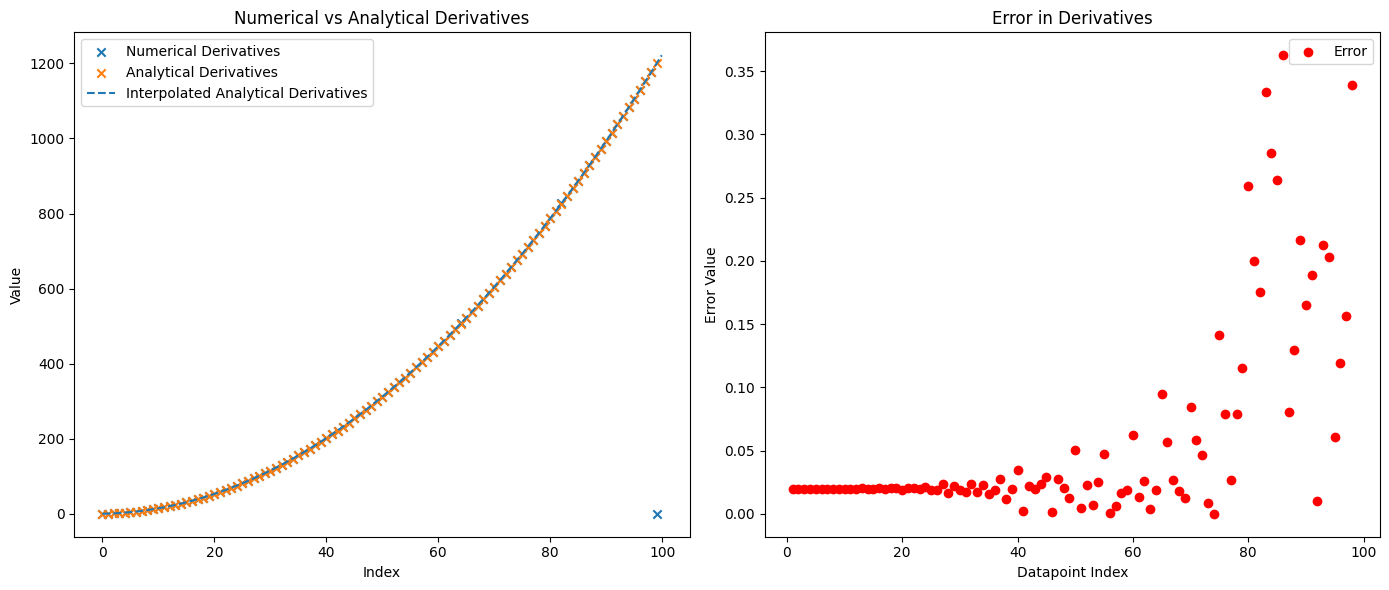

In [107]:
# Compile the Fortran program
os.system('gfortran -o task3 task3.f90')

# Define the input variables as a multi-line string
n_points = 100
grid_spacing = .1
inputs = f'{n_points}\n{grid_spacing}\n'

# Execute the Fortran program with the inputs
os.system(f'echo "{inputs}" | ./task3')

numerical_derivatives, analytical_derivatives, errors = read_data()
ploting(numerical_derivatives, analytical_derivatives, errors)


Results for: 
$f(x) = x⁴$

The results indicate that the derivative calculations, both numerical and analytical, align as expected, highlighting the numerical method's accuracy for linear derivatives. Importantly, the error between these calculations shows little dependence on grid spacing, a characteristic attributed to the derivative's linear nature. This linearity ensures that errors remain consistent across various grid spacings, demonstrating the numerical method's robustness in this context. 

Execute with Sius Function:


 Enter the number of grid points (n):
 Enter the grid spacing (h):
 numerical 2nd derivative:
   0.00000000      0.499999940       1.10000014       1.93999922       3.02000022       4.33999729       5.90001011       7.69999552       9.73998260       12.0200148       14.5399799       17.3000565       20.2998619       23.5401134       27.0200233       30.7398777       34.7001038       38.8996086       43.3403931       48.0205498       52.9388390       58.1003151       63.5002098       69.1398544       75.0209732       81.1389847       87.4988480       94.1032333       100.936882       108.022301       115.338890       122.897331       130.703720       138.737473       147.022995       155.535873       164.298996       173.307785       182.531723       192.019638       201.754745       211.682114       221.902451       232.339462       243.023666       253.948959       265.081757       276.507538       288.140839       300.012177       312.170380       324.475067       337.103241       34

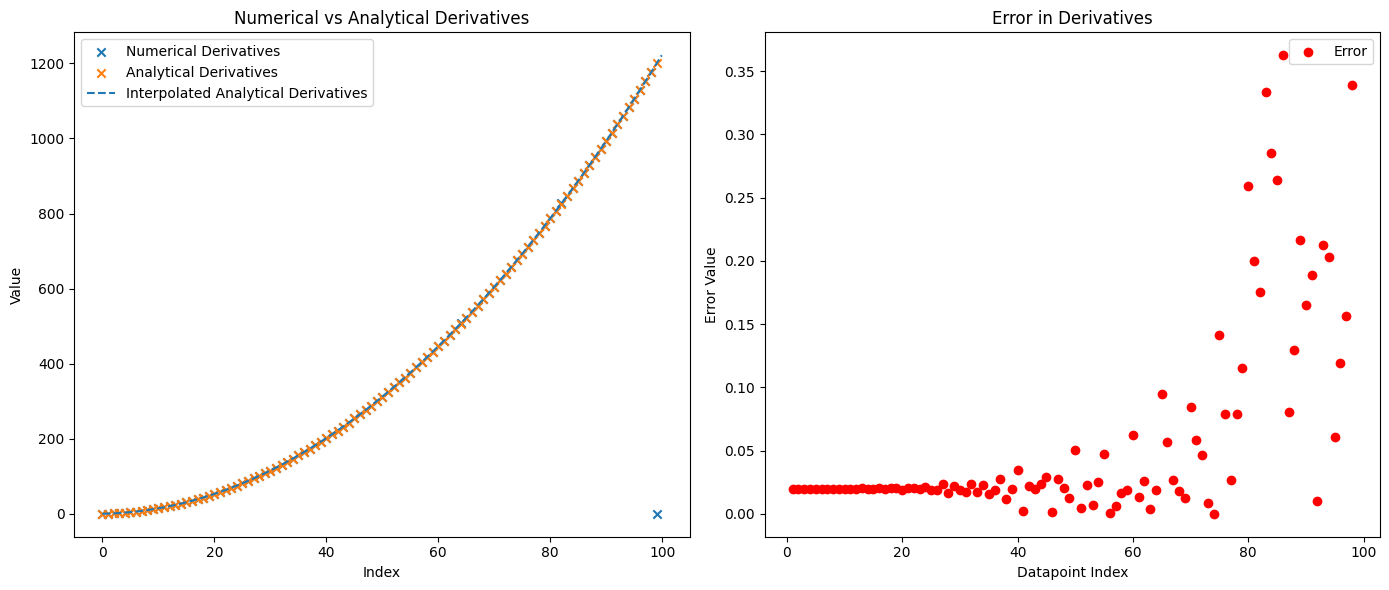

In [112]:
# Compile the Fortran program
os.system('gfortran -o task3 task3.f90')

# Define the input variables as a multi-line string
n_points = 100
grid_spacing = .1
inputs = f'{n_points}\n{grid_spacing}\n'

# Execute the Fortran program with the inputs
os.system(f'echo "{inputs}" | ./task3')


numerical_derivatives, analytical_derivatives, errors = read_data()
ploting(numerical_derivatives, analytical_derivatives, errors)

Both the sin and the polyfunction work just as aspected.


 Enter the number of grid points (n):
 Enter the grid spacing (h):
 numerical 2nd derivative:
   0.00000000       50.0000000       110.000000       194.000000       302.000000       434.000000       590.000000       770.000000       974.000000       1202.00000       1454.00000       1730.00000       2030.00000       2354.00000       2702.00000       3074.00000       3470.00000       3890.00000       4334.00000       4802.00000       5294.00000       5810.00000       6350.00000       6914.00000       7502.00000       8114.00000       8750.00000       9410.00000       10094.0000       10802.0000       11534.0000       12290.0000       13070.0000       13874.0000       14702.0000       15554.0000       16430.0000       17330.0000       18254.0000       19202.0000       20174.0000       21170.0000       22190.0000       23234.0000       24302.0000       25394.0000       26510.0000       27650.0000       28814.0000       30002.0000       31214.0000       32450.0000       33710.0000       34

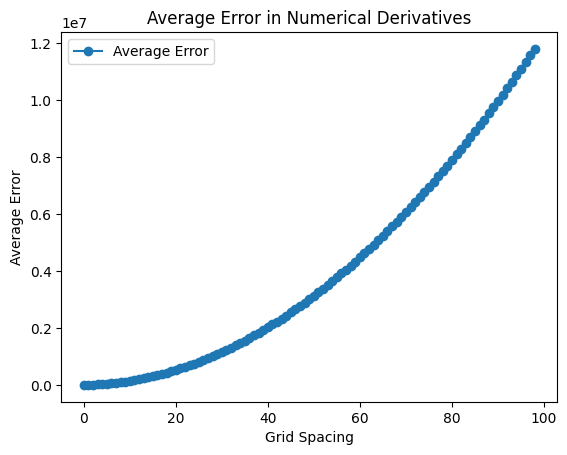

In [115]:
#analayse the error of the numerical derivatives of the sin function with varying grid spacing

n_points = 100
avg_errors = []



for grid_spacing in range(1, 100):
    inputs = f'{n_points}\n{grid_spacing}\n'
    os.system(f'echo "{inputs}" | ./task3')
    numerical_derivatives, analytical_derivatives, errors = read_data()
    avg_errors.append(np.mean(errors))

plt.plot(avg_errors, label='Average Error', marker='o')
plt.title('Average Error in Numerical Derivatives')
plt.xlabel('Grid Spacing')
plt.ylabel('Average Error')
plt.legend()
plt.show()